In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})

In [3]:
df

,key1,key2,data1,data2
0,a,one,0.466949,-0.286860
1,a,two,0.206779,-0.929094
2,b,one,0.409722,0.030570
3,b,two,-0.287142,0.081001
4,a,one,1.529271,0.937879


In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [6]:
grouped.mean()

key1
a    0.734333
b    0.061290
Name: data1, dtype: float64

变量grouped是一个GroupBy对象。它实际上还没有进行任何计算，只是含有一些有关分组键df['key1']的中间数据而已。换句话说，该对象已经有了接下来对各分组执行运算所需的一切信息。例如，我们可以调用GroupBy的mean方法来计算分组平均值：

In [8]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.998110
      two     0.206779
b     one     0.409722
      two    -0.287142
Name: data1, dtype: float64

In [9]:
means.unstack()

key2,one,two
key1,,
a,0.998110,0.206779
b,0.409722,-0.287142


In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states,years]).mean()

California  2005    0.206779
            2006    0.409722
Ohio        2005    0.089904
            2006    1.529271
Name: data1, dtype: float64

你可能已经注意到了，第一个例子在执行df.groupby('key1').mean()时，结果中没有key2列。这是因为df['key2']不是数值数据（俗称“麻烦列”），所以被从结果中排除了。默认情况下，所有数值列都会被聚合，虽然有时可能会被过滤为一个子集，稍后就会碰到。
无论你准备拿groupby做什么，都有可能会用到GroupBy的size方法，它可以返回一个含有分组大小的Series

In [11]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.466949 -0.286860
1    a  two  0.206779 -0.929094
4    a  one  1.529271  0.937879
b
  key1 key2     data1     data2
2    b  one  0.409722  0.030570
3    b  two -0.287142  0.081001


In [12]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.466949 -0.286860
4    a  one  1.529271  0.937879
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.206779 -0.929094
('b', 'one')
  key1 key2     data1    data2
2    b  one  0.409722  0.03057
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.287142  0.081001


In [15]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,0.409722,0.030570
3,b,two,-0.287142,0.081001


groupby默认是在axis=0上进行分组的，通过设置也可以在其他任何轴上进行分组。拿上面例子中的df来说，我们可以根据dtype对列进行分组：

In [16]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [19]:
grouped = df.groupby(df.dtypes,axis=1)
for dtype,group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.466949 -0.286860
1  0.206779 -0.929094
2  0.409722  0.030570
3 -0.287142  0.081001
4  1.529271  0.937879
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [23]:
df.groupby('key1')['data1']

In [34]:
df.groupby('key1')[['data2']]

In [35]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.325510
     two  -0.929094
b    one   0.030570
     two   0.081001

In [37]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one     0.325510
      two    -0.929094
b     one     0.030570
      two     0.081001
Name: data2, dtype: float64

In [38]:
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index = ['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3,[1,2]] = np.nan

In [39]:
people

,a,b,c,d,e
Joe,-0.593506,-0.288531,-0.470830,0.961484,-0.806165
Steve,0.350602,0.512508,0.566998,1.439116,-0.977133
Wes,1.059198,NaN,NaN,0.262928,-1.454151
Jim,-1.029037,-1.815336,0.184475,-0.622012,0.735700
Travis,-0.455244,0.476794,-0.669909,0.080516,1.261437


In [40]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
        'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [41]:
by_column = people.groupby(mapping,axis=1)

In [42]:
by_column.sum()

,blue,red
Joe,0.490654,-1.688202
Steve,2.006115,-0.114024
Wes,0.262928,-0.394953
Jim,-0.437537,-2.108673
Travis,-0.589394,1.282987


In [43]:
map_series = pd.Series(mapping)

In [44]:
 map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [45]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [47]:
 people.groupby(len).sum()

,a,b,c,d,e
3,-0.563345,-2.103868,-0.286354,0.602400,-1.524616
5,0.350602,0.512508,0.566998,1.439116,-0.977133
6,-0.455244,0.476794,-0.669909,0.080516,1.261437


In [48]:
df

,key1,key2,data1,data2
0,a,one,0.466949,-0.286860
1,a,two,0.206779,-0.929094
2,b,one,0.409722,0.030570
3,b,two,-0.287142,0.081001
4,a,one,1.529271,0.937879


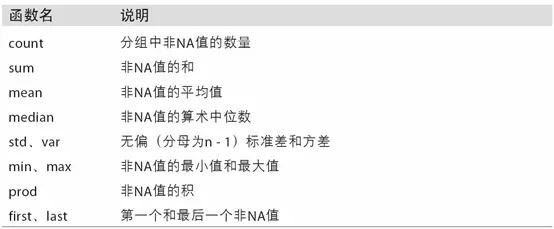

In [52]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.316807
b    0.340036
Name: data1, dtype: float64

In [53]:
def peak_to_peak(arr):
    return arr.max()-arr.min()

In [54]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.322492,1.866974
b,0.696864,0.050431


你可能注意到注意，有些方法（如describe）也是可以用在这里的，即使严格来讲，它们并非聚合运算：

In [55]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.734333  0.700619  0.206779  0.336864  0.466949  0.998110   
b      2.0  0.061290  0.492757 -0.287142 -0.112926  0.061290  0.235506   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.529271   3.0 -0.092692  0.948511 -0.929094 -0.607977 -0.286860   
b     0.409722   2.0  0.055785  0.035660  0.030570  0.043178  0.055785   

                          
           75%       max  
key1                      
a     0.325510  0.937879  
b     0.068393  0.081001

In [61]:
tips = pd.read_csv('examples/tips.csv')

In [62]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [63]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


你已经看到，对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法。然而，你可能希望对不同的列使用不同的聚合函数，或一次应用多个函数。其实这也好办，我将通过一些示例来进行讲解。首先，我根据天和smoker对tips进行分组：


In [65]:
grouped_pct = groupby(['day','smoker'])
grouped_pct.agg('mean')

NameError: name 'groupby' is not defined